# 1851 Rule-Based Evaluate

In [ ]:
import pandas as pd
import numpy as np

original_1851 = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Data\\OCCs_1851.csv",header=0)
rule_based_1851 = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1851\\cleaned_occupations_with_categories.csv",header=0)

## 1851 OccCANINE Evaluate

In [3]:
import pandas as pd
import numpy as np


# Load 1851 result
original_1851 = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Data\\OCCs_1851.csv",header=0)
res_1851 = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1851\\OccCANINE_result_merged.csv",header=0)


Starting Occupation Standardization Workflow Evaluation...

OCCUPATION STANDARDIZATION EVALUATION RESULTS

📊 DATASET OVERVIEW:
   Total Records: 1,282,192
   Unique Original Occupations: 673,822
   Unique Standardized Occupations: 567,146
   Standardization Reduction: 15.8%

🎯 CONFIDENCE SCORE ANALYSIS:
   Mean Confidence: 0.777
   Median Confidence: 0.815
   Standard Deviation: 0.161
   High Confidence (≥0.8): 830,092 (64.7%)
   Medium Confidence (0.5-0.8): 387,980 (30.3%)
   Low Confidence (<0.5): 64,120 (5.0%)

🤖 LLM PROCESSING REQUIREMENTS:
   Records Requiring LLM Check: 232,854 (18.2%)
   Records Processed Automatically: 1,049,338 (81.8%)

   Top Reasons for LLM Check:
     unchanged_with_some_invalid_words: 134,048 (57.6%)
     unchanged_with_many_invalid_words: 49,399 (21.2%)
     modification_poor_result: 45,956 (19.7%)
     low_confidence: 3,447 (1.5%)
     very_low_confidence: 4 (0.0%)

🔀 MULTI-OCCUPATION DETECTION:
   Multi-occupation Records: 222,033 (17.3%)

🏛️ OccCANINE 

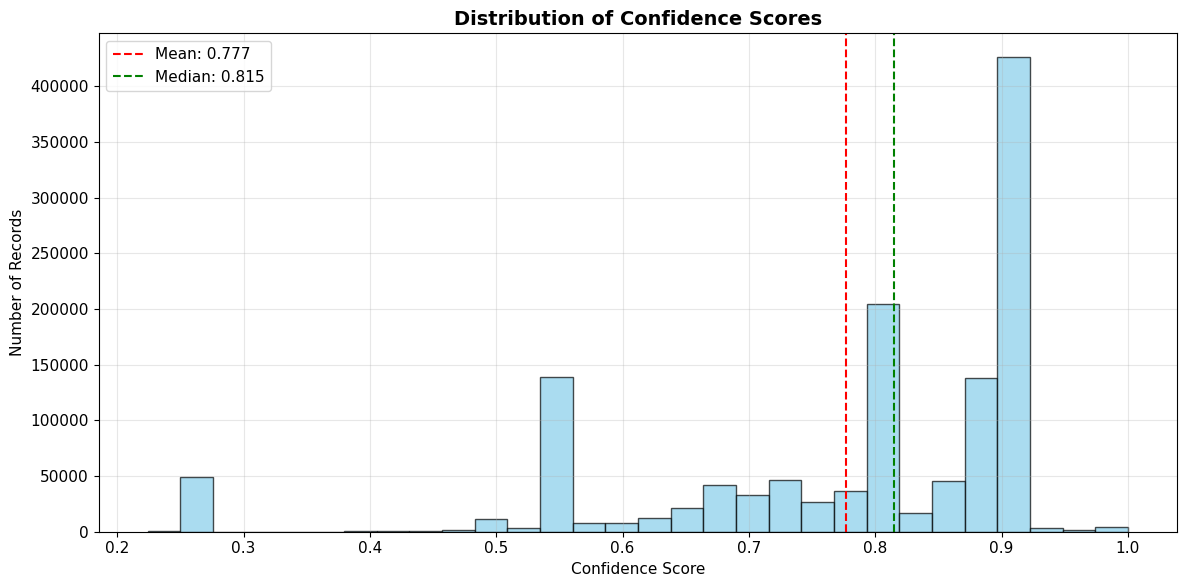

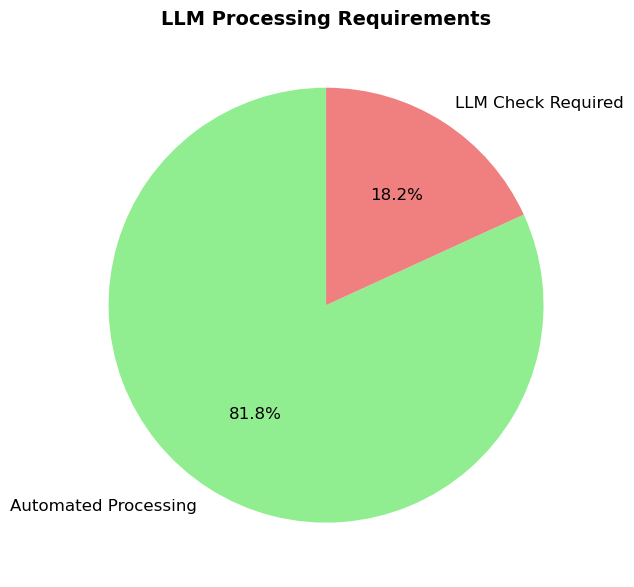

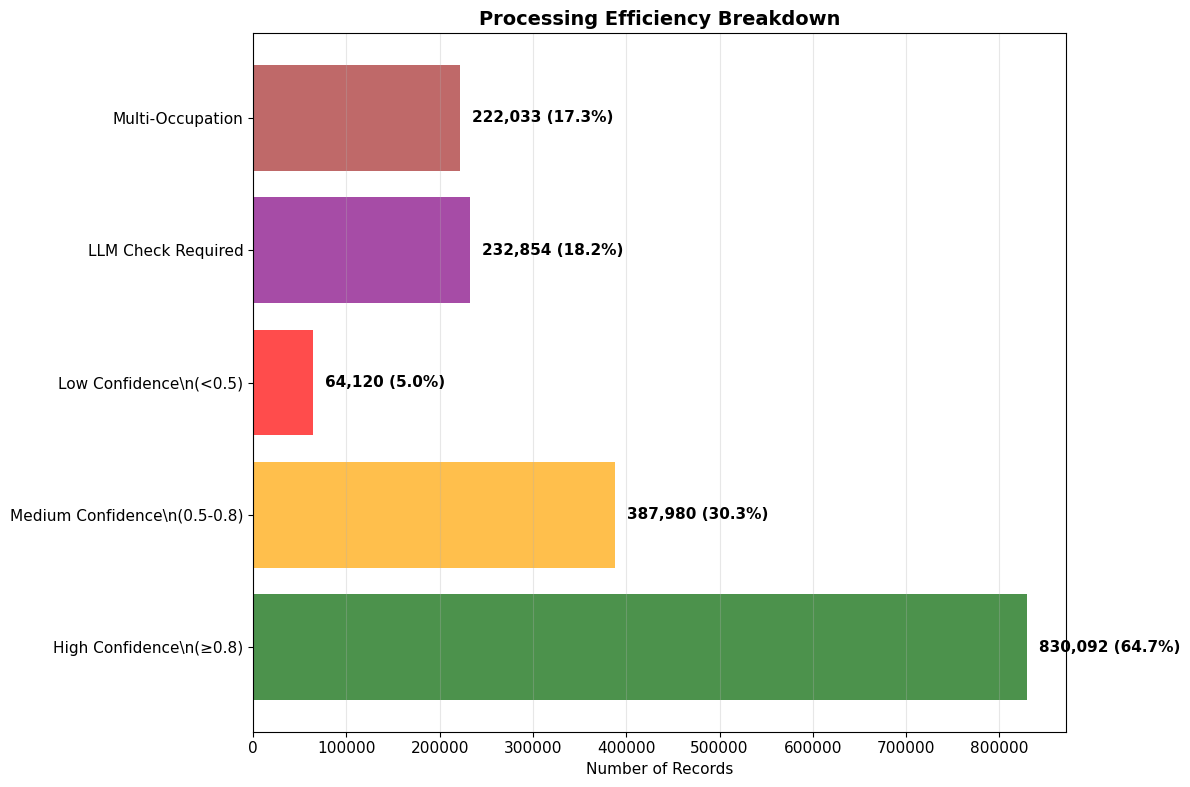

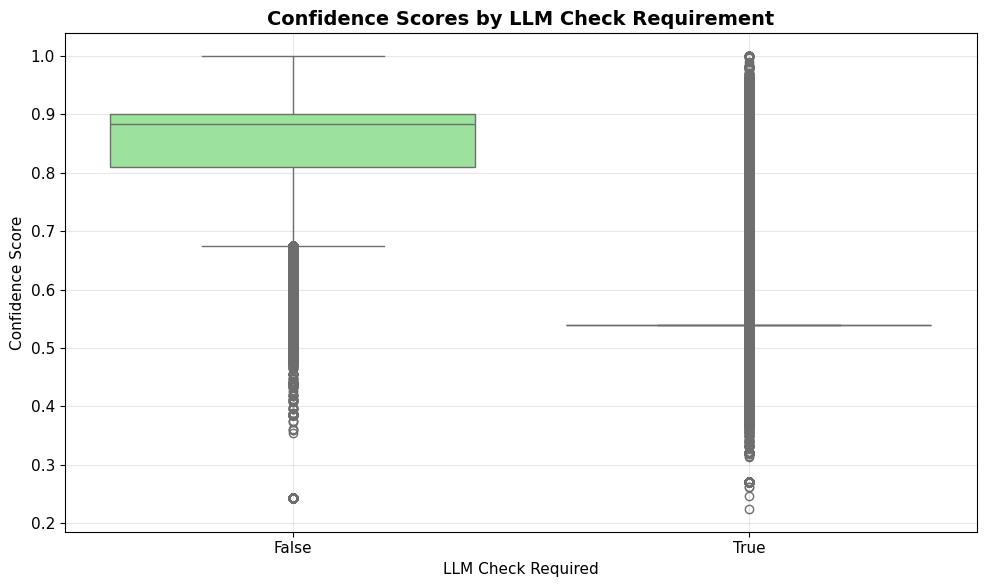

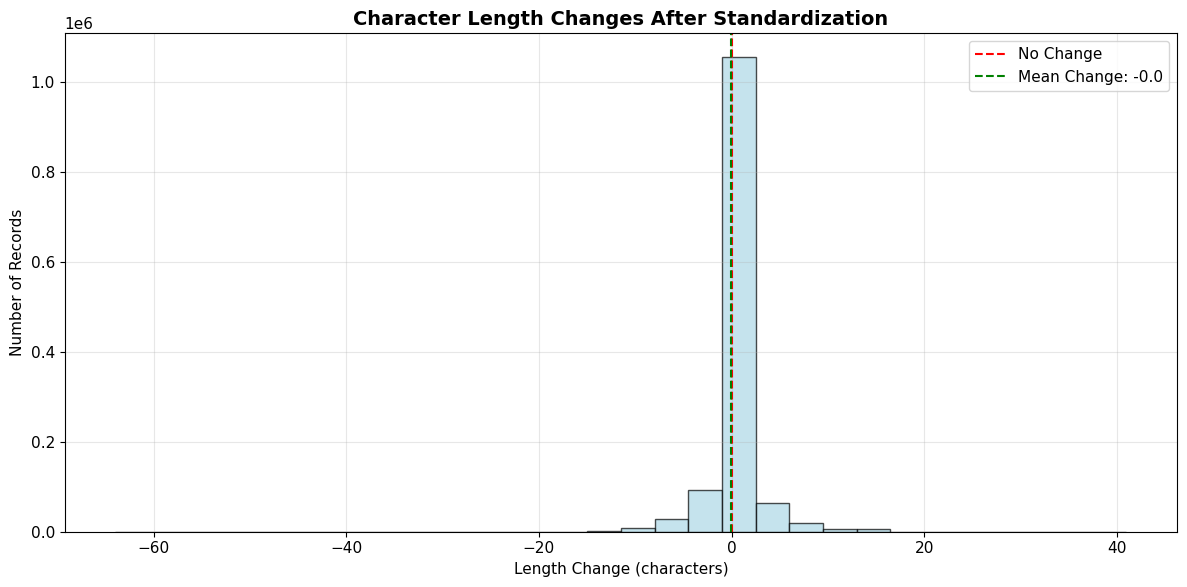

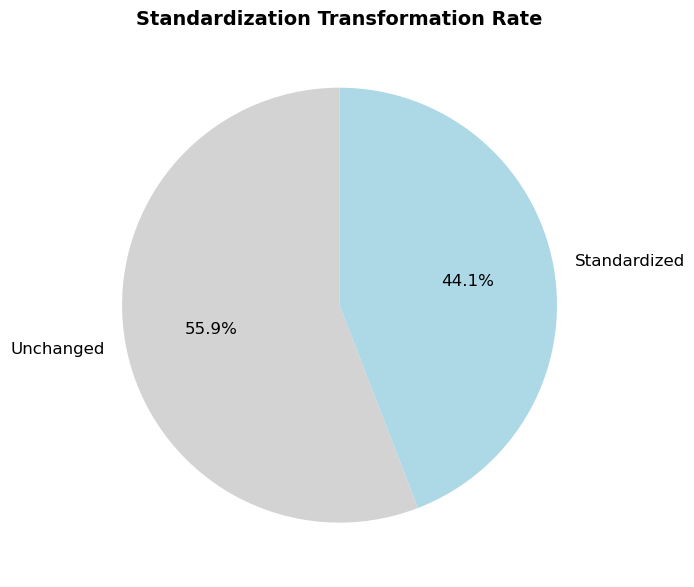


📂 OCCUPATION CATEGORIES ANALYSIS:
   Top 10 Categories:
     other: 486,889 (38.0%)
     family_dependent: 134,919 (10.5%)
     agricultural: 101,586 (7.9%)
     food_drink: 91,246 (7.1%)
     building_construction: 75,471 (5.9%)
     professional_clerical: 72,212 (5.6%)
     clothing_footwear: 42,577 (3.3%)
     domestic_service: 38,627 (3.0%)
     retail_trade: 36,405 (2.8%)
     metalwork_engineering: 35,391 (2.8%)


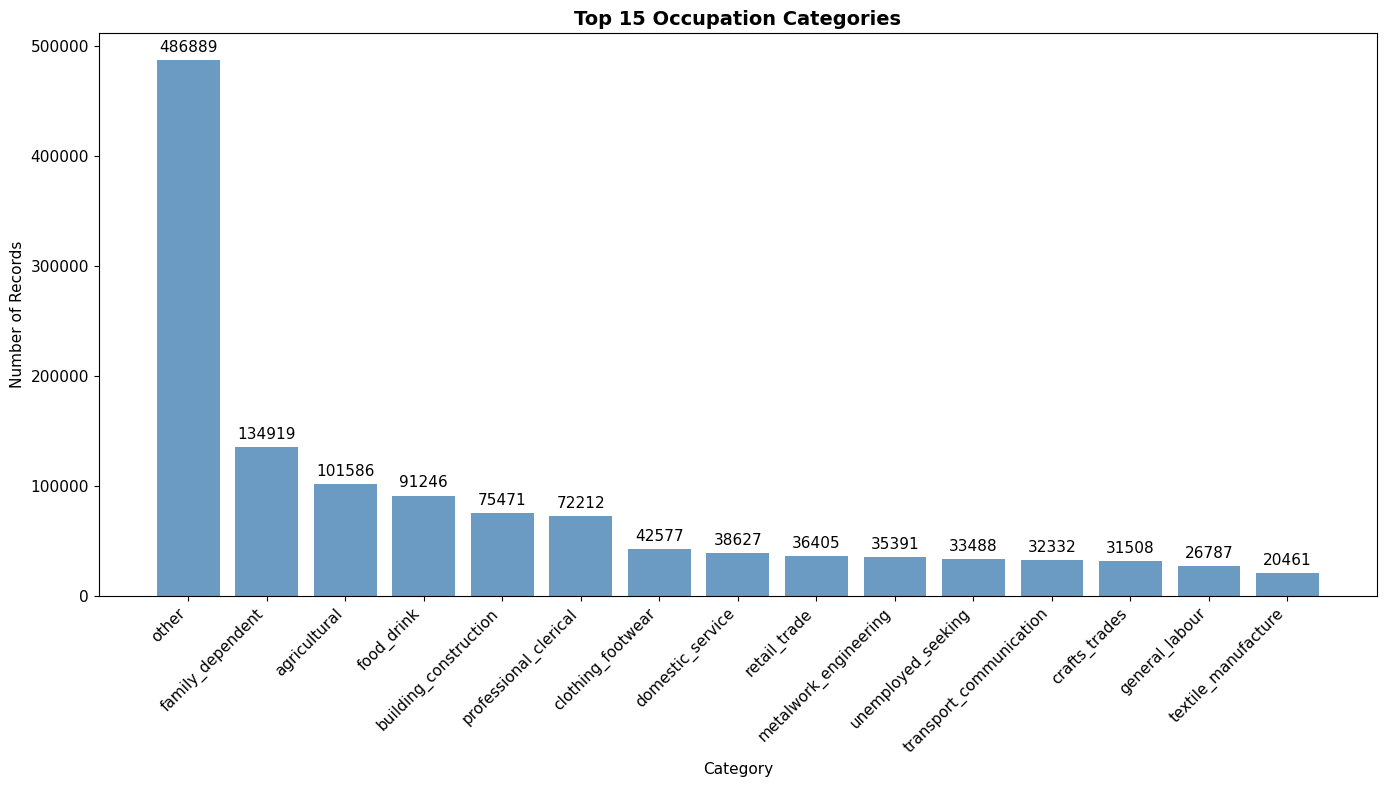


✅ Evaluation completed successfully!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib styling
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

def load_and_evaluate_occupation_data(original_csv_path, processed_csv_path):
    """
    Load and evaluate your actual occupation standardization data
    
    Parameters:
    original_csv_path: Path to your original_1851.csv file
    processed_csv_path: Path to your res_1851.csv file
    """
    
    # Load the datasets
    print("Loading datasets...")
    original_df = pd.read_csv(original_csv_path)
    processed_df = pd.read_csv(processed_csv_path)
    
    print(f"Original dataset: {len(original_df):,} records")
    print(f"Processed dataset: {len(processed_df):,} records")
    
    return original_df, processed_df

def evaluate_standardization_effectiveness(original_df, processed_df):
    """
    Comprehensive evaluation of standardization effectiveness with OccCANINE analysis
    """
    
    print("\n" + "="*80)
    print("OCCUPATION STANDARDIZATION EVALUATION RESULTS")
    print("="*80)
    
    # Basic statistics
    total_records = len(processed_df)
    unique_original = processed_df['Occupation_String'].nunique()
    unique_standardized = processed_df['final_result'].nunique()
    
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"   Total Records: {total_records:,}")
    print(f"   Unique Original Occupations: {unique_original:,}")
    print(f"   Unique Standardized Occupations: {unique_standardized:,}")
    print(f"   Standardization Reduction: {((unique_original - unique_standardized) / unique_original * 100):.1f}%")
    
    # Confidence analysis
    if 'confidence' in processed_df.columns:
        conf_stats = processed_df['confidence'].describe()
        print(f"\n🎯 CONFIDENCE SCORE ANALYSIS:")
        print(f"   Mean Confidence: {conf_stats['mean']:.3f}")
        print(f"   Median Confidence: {conf_stats['50%']:.3f}")
        print(f"   Standard Deviation: {conf_stats['std']:.3f}")
        
        # Confidence categories
        high_conf = (processed_df['confidence'] >= 0.8).sum()
        med_conf = ((processed_df['confidence'] >= 0.5) & (processed_df['confidence'] < 0.8)).sum()
        low_conf = (processed_df['confidence'] < 0.5).sum()
        
        print(f"   High Confidence (≥0.8): {high_conf:,} ({high_conf/total_records*100:.1f}%)")
        print(f"   Medium Confidence (0.5-0.8): {med_conf:,} ({med_conf/total_records*100:.1f}%)")
        print(f"   Low Confidence (<0.5): {low_conf:,} ({low_conf/total_records*100:.1f}%)")
    
    # LLM check analysis
    if 'needs_llm_check' in processed_df.columns:
        llm_needed = processed_df['needs_llm_check'].sum()
        llm_percentage = (llm_needed / total_records) * 100
        
        print(f"\n🤖 LLM PROCESSING REQUIREMENTS:")
        print(f"   Records Requiring LLM Check: {llm_needed:,} ({llm_percentage:.1f}%)")
        print(f"   Records Processed Automatically: {total_records - llm_needed:,} ({100 - llm_percentage:.1f}%)")
        
        # Reasons for LLM check
        if 'confidence_reason' in processed_df.columns:
            print(f"\n   Top Reasons for LLM Check:")
            reason_counts = processed_df[processed_df['needs_llm_check']]['confidence_reason'].value_counts()
            for reason, count in reason_counts.head(5).items():
                pct = count / llm_needed * 100 if llm_needed > 0 else 0
                print(f"     {reason}: {count:,} ({pct:.1f}%)")
    
    # Multi-occupation analysis
    if 'is_multiple_occupation' in processed_df.columns:
        multi_occ = processed_df['is_multiple_occupation'].sum()
        multi_percentage = (multi_occ / total_records) * 100
        
        print(f"\n🔀 MULTI-OCCUPATION DETECTION:")
        print(f"   Multi-occupation Records: {multi_occ:,} ({multi_percentage:.1f}%)")
    
    # NEW: OccCANINE Analysis
    if 'OccCANINE_Check' in processed_df.columns:
        print(f"\n🏛️ OccCANINE HISCO PREDICTION ANALYSIS:")
        
        # Analyze OccCANINE processing results
        occcanine_data = processed_df['OccCANINE_Check']
        
        # Count successful predictions (non-null, non-empty)
        successful_predictions = 0
        failed_predictions = 0
        prediction_confidences = []
        predicted_hisco_codes = []
        
        for idx, prediction in enumerate(occcanine_data):
            if pd.isna(prediction) or prediction == '' or str(prediction).strip() == '[]' or str(prediction).strip() == 'NaN':
                failed_predictions += 1
            else:
                successful_predictions += 1
                # Try to extract prediction confidence if available
                try:
                    prediction_str = str(prediction)
                    if 'np.float32' in prediction_str or 'float32' in prediction_str:
                        # Extract confidence scores from string representation
                        import re
                        confidence_matches = re.findall(r'(?:np\.)?float32\(([\d.]+)\)', prediction_str)
                        if confidence_matches:
                            prediction_confidences.extend([float(c) for c in confidence_matches])
                        
                        # Extract HISCO codes
                        hisco_matches = re.findall(r'(\d{5})', prediction_str)
                        if hisco_matches:
                            predicted_hisco_codes.extend(hisco_matches)
                
                except:
                    pass  # Skip problematic entries
        
        success_rate = (successful_predictions / total_records) * 100 if total_records > 0 else 0
        failure_rate = (failed_predictions / total_records) * 100 if total_records > 0 else 0
        
        print(f"   Successful HISCO Predictions: {successful_predictions:,} ({success_rate:.1f}%)")
        print(f"   Failed Predictions: {failed_predictions:,} ({failure_rate:.1f}%)")
        
        # OccCANINE prediction confidence analysis
        if prediction_confidences:
            import numpy as np
            pred_conf_mean = np.mean(prediction_confidences)
            pred_conf_median = np.median(prediction_confidences)
            pred_conf_std = np.std(prediction_confidences)
            
            print(f"\n   OccCANINE Prediction Confidence:")
            print(f"     Mean Prediction Confidence: {pred_conf_mean:.3f}")
            print(f"     Median Prediction Confidence: {pred_conf_median:.3f}")
            print(f"     Std Deviation: {pred_conf_std:.3f}")
            print(f"     Total Predictions Analyzed: {len(prediction_confidences):,}")
        
        # Most common predicted HISCO codes
        if predicted_hisco_codes:
            from collections import Counter
            hisco_counter = Counter(predicted_hisco_codes)
            print(f"\n   Top 5 Most Common HISCO Predictions:")
            for hisco, count in hisco_counter.most_common(5):
                pct = count / len(predicted_hisco_codes) * 100
                print(f"     HISCO {hisco}: {count:,} predictions ({pct:.1f}%)")
        
        # Integration with rule-based processing
        if 'confidence' in processed_df.columns and 'needs_llm_check' in processed_df.columns:
            # Analyze correlation between rule-based confidence and OccCANINE success
            rule_high_conf_occcanine_success = 0
            rule_low_conf_occcanine_success = 0
            
            for idx, row in processed_df.iterrows():
                if not pd.isna(row['OccCANINE_Check']) and str(row['OccCANINE_Check']).strip() not in ['[]', 'NaN', '']:
                    if row['confidence'] >= 0.8:
                        rule_high_conf_occcanine_success += 1
                    elif row['confidence'] < 0.5:
                        rule_low_conf_occcanine_success += 1
            
            print(f"\n   Rule-based vs OccCANINE Integration:")
            high_conf_records = (processed_df['confidence'] >= 0.8).sum()
            low_conf_records = (processed_df['confidence'] < 0.5).sum()
            
            if high_conf_records > 0:
                high_conf_success_rate = (rule_high_conf_occcanine_success / high_conf_records) * 100
                print(f"     High Rule Confidence → OccCANINE Success: {rule_high_conf_occcanine_success:,}/{high_conf_records:,} ({high_conf_success_rate:.1f}%)")
            
            if low_conf_records > 0:
                low_conf_success_rate = (rule_low_conf_occcanine_success / low_conf_records) * 100
                print(f"     Low Rule Confidence → OccCANINE Success: {rule_low_conf_occcanine_success:,}/{low_conf_records:,} ({low_conf_success_rate:.1f}%)")
    
    # Time and cost savings estimation
    manual_seconds_per_record = 10
    total_manual_hours = (total_records * manual_seconds_per_record) / 3600
    
    if 'needs_llm_check' in processed_df.columns:
        automated_records = total_records - llm_needed
        time_saved_hours = (automated_records * manual_seconds_per_record) / 3600
        efficiency_gain = (time_saved_hours / total_manual_hours) * 100
        
        print(f"\n⏱️ EFFICIENCY ANALYSIS:")
        print(f"   Estimated Total Manual Time: {total_manual_hours:.1f} hours")
        print(f"   Time Saved Through Automation: {time_saved_hours:.1f} hours")
        print(f"   Efficiency Gain: {efficiency_gain:.1f}%")
        
        print(f"\n💰 COST EFFICIENCY:")
        print(f"   LLM Usage Reduced to: {llm_percentage:.1f}% of dataset")
        print(f"   Estimated Cost Reduction vs Pure LLM: {100-llm_percentage:.1f}%")
    
    # NEW: Overall Pipeline Success Analysis
    print(f"\n🎯 OVERALL PIPELINE PERFORMANCE:")
    
    # Calculate end-to-end success rate
    if 'OccCANINE_Check' in processed_df.columns:
        end_to_end_success = successful_predictions
        pipeline_success_rate = (end_to_end_success / total_records) * 100
        
        print(f"   End-to-End Processing Success: {end_to_end_success:,} ({pipeline_success_rate:.1f}%)")
        print(f"   Complete Pipeline (Rule-based + OccCANINE): {pipeline_success_rate:.1f}% success rate")
        
        # Breakdown by processing stage
        if 'needs_llm_check' in processed_df.columns:
            automated_success = 0
            llm_flagged_success = 0
            
            for idx, row in processed_df.iterrows():
                has_occcanine = not pd.isna(row['OccCANINE_Check']) and str(row['OccCANINE_Check']).strip() not in ['[]', 'NaN', '']
                
                if has_occcanine:
                    if not row['needs_llm_check']:
                        automated_success += 1
                    else:
                        llm_flagged_success += 1
            
            print(f"\n   Success by Processing Stage:")
            print(f"     Automated Processing → HISCO: {automated_success:,}")
            print(f"     LLM-Flagged → HISCO: {llm_flagged_success:,}")
            
            if automated_records > 0:
                auto_to_hisco_rate = (automated_success / automated_records) * 100
                print(f"     Automated Success Rate: {auto_to_hisco_rate:.1f}%")
            
            if llm_needed > 0:
                llm_to_hisco_rate = (llm_flagged_success / llm_needed) * 100
                print(f"     LLM-Flagged Success Rate: {llm_to_hisco_rate:.1f}%")

def create_individual_charts(processed_df):
    """
    Create individual charts for different aspects of the analysis
    """
    
    # Chart 1: Confidence Score Distribution
    plt.figure(figsize=(12, 6))
    
    if 'confidence' in processed_df.columns:
        confidence_scores = processed_df['confidence']
        plt.hist(confidence_scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(confidence_scores.mean(), color='red', linestyle='--', 
                   label=f'Mean: {confidence_scores.mean():.3f}')
        plt.axvline(confidence_scores.median(), color='green', linestyle='--', 
                   label=f'Median: {confidence_scores.median():.3f}')
        
        plt.title('Distribution of Confidence Scores', fontsize=14, fontweight='bold')
        plt.xlabel('Confidence Score')
        plt.ylabel('Number of Records')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Chart 2: LLM Check Requirements
    plt.figure(figsize=(10, 6))
    
    if 'needs_llm_check' in processed_df.columns:
        llm_counts = processed_df['needs_llm_check'].value_counts()
        labels = ['Automated Processing', 'LLM Check Required']
        colors = ['lightgreen', 'lightcoral']
        
        plt.pie(llm_counts.values, labels=labels, colors=colors, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 12})
        plt.title('LLM Processing Requirements', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    # Chart 3: Processing Efficiency Breakdown
    plt.figure(figsize=(12, 8))
    
    categories_data = {}
    
    if 'confidence' in processed_df.columns:
        categories_data['High Confidence\\n(≥0.8)'] = (processed_df['confidence'] >= 0.8).sum()
        categories_data['Medium Confidence\\n(0.5-0.8)'] = ((processed_df['confidence'] >= 0.5) & 
                                                           (processed_df['confidence'] < 0.8)).sum()
        categories_data['Low Confidence\\n(<0.5)'] = (processed_df['confidence'] < 0.5).sum()
    
    if 'needs_llm_check' in processed_df.columns:
        categories_data['LLM Check Required'] = processed_df['needs_llm_check'].sum()
    
    if 'is_multiple_occupation' in processed_df.columns:
        categories_data['Multi-Occupation'] = processed_df['is_multiple_occupation'].sum()
    
    if categories_data:
        y_pos = np.arange(len(categories_data))
        values = list(categories_data.values())
        total_records = len(processed_df)
        percentages = [v/total_records*100 for v in values]
        
        bars = plt.barh(y_pos, values, color=['darkgreen', 'orange', 'red', 'purple', 'brown'][:len(values)], alpha=0.7)
        
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            plt.text(bar.get_width() + total_records*0.01, bar.get_y() + bar.get_height()/2,
                    f'{values[i]:,} ({pct:.1f}%)', ha='left', va='center', fontweight='bold')
        
        plt.yticks(y_pos, categories_data.keys())
        plt.xlabel('Number of Records')
        plt.title('Processing Efficiency Breakdown', fontsize=14, fontweight='bold')
        plt.grid(True, axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Chart 4: Confidence by LLM Check Requirement
    if 'confidence' in processed_df.columns and 'needs_llm_check' in processed_df.columns:
        plt.figure(figsize=(10, 6))
        
        sns.boxplot(data=processed_df, x='needs_llm_check', y='confidence', 
                   palette=['lightgreen', 'lightcoral'])
        plt.title('Confidence Scores by LLM Check Requirement', fontsize=14, fontweight='bold')
        plt.xlabel('LLM Check Required')
        plt.ylabel('Confidence Score')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Chart 5: Text Length Analysis
    if 'Occupation_String' in processed_df.columns and 'final_result' in processed_df.columns:
        plt.figure(figsize=(12, 6))
        
        original_lengths = processed_df['Occupation_String'].astype(str).str.len()
        standardized_lengths = processed_df['final_result'].astype(str).str.len()
        length_changes = standardized_lengths - original_lengths
        
        plt.hist(length_changes, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
        plt.axvline(0, color='red', linestyle='--', label='No Change')
        plt.axvline(length_changes.mean(), color='green', linestyle='--', 
                   label=f'Mean Change: {length_changes.mean():.1f}')
        
        plt.title('Character Length Changes After Standardization', fontsize=14, fontweight='bold')
        plt.xlabel('Length Change (characters)')
        plt.ylabel('Number of Records')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Chart 6: Standardization Impact Analysis
    if 'Occupation_String' in processed_df.columns and 'final_result' in processed_df.columns:
        # Calculate transformation statistics
        unchanged_count = (processed_df['Occupation_String'] == processed_df['final_result']).sum()
        changed_count = len(processed_df) - unchanged_count
        
        plt.figure(figsize=(10, 6))
        
        labels = ['Unchanged', 'Standardized']
        sizes = [unchanged_count, changed_count]
        colors = ['lightgray', 'lightblue']
        
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 12})
        plt.title('Standardization Transformation Rate', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

def analyze_occupation_categories(processed_df):
    """
    Analyze occupation categories and their processing
    """
    if 'category' in processed_df.columns:
        print(f"\n📂 OCCUPATION CATEGORIES ANALYSIS:")
        category_counts = processed_df['category'].value_counts()
        
        print(f"   Top 10 Categories:")
        for category, count in category_counts.head(10).items():
            percentage = count / len(processed_df) * 100
            print(f"     {category}: {count:,} ({percentage:.1f}%)")
        
        # Create category distribution chart
        plt.figure(figsize=(14, 8))
        top_categories = category_counts.head(15)
        
        plt.bar(range(len(top_categories)), top_categories.values, color='steelblue', alpha=0.8)
        plt.xticks(range(len(top_categories)), top_categories.index, rotation=45, ha='right')
        plt.title('Top 15 Occupation Categories', fontsize=14, fontweight='bold')
        plt.xlabel('Category')
        plt.ylabel('Number of Records')
        
        for i, v in enumerate(top_categories.values):
            plt.text(i, v + max(top_categories.values)*0.01, str(v), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

# Main execution function
def run_complete_evaluation(original_df, processed_df):
    """
    Run complete evaluation of your occupation standardization workflow
    """
    try:
        # Run evaluation
        evaluate_standardization_effectiveness(original_df, processed_df)
        
        # Create individual charts
        print(f"\nGenerating individual visualization charts...")
        create_individual_charts(processed_df)
        
        # Analyze categories if available
        analyze_occupation_categories(processed_df)
        
        print(f"\n✅ Evaluation completed successfully!")
        
    except Exception as e:
        print(f"❌ Error during evaluation: {e}")
        print("Please check your file paths and data structure.")

# Usage example
if __name__ == "__main__":

    ORIGINAL_DATA = original_1851
    PROCESSED_DATA = res_1851
    
    print("Starting Occupation Standardization Workflow Evaluation...")
    print("="*60)
    
    run_complete_evaluation(ORIGINAL_DATA, PROCESSED_DATA)

In [29]:
import pandas as pd
import numpy as np


# Load 1851 result
res_1881 = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1911\\OccCANINE_result_merged.csv",header=0)
validation_samples = res_1881.sample(n=100, random_state=42)
validation_samples.to_csv("validation_samples_1911.csv")

get 100 results from res_1851, 53 True predictions and 47 wrong predictions

CONFIDENCE ASSESSMENT EVALUATION SYSTEM
Successfully loaded 100 records

BASIC STATISTICAL SUMMARY
Sample Size: 100
Confidence Score Statistics:
  Mean: 0.7896 ± 0.1538
  Range: 0.270 - 1.000
  Median: 0.8867
  Q1: 0.6901
  Q3: 0.9000

Rule-Based Score Statistics:
  Mean: 4.1800 ± 0.7834
  Range: 2 - 5
  Distribution: {2: np.int64(2), 3: np.int64(17), 4: np.int64(42), 5: np.int64(39)}

CORRELATION ANALYSIS
Pearson Correlation: r = 0.8410 (p = 0.000000)
Spearman Correlation: ρ = 0.8200 (p = 0.000000)
Kendall's Tau: τ = 0.7368 (p = 0.000000)
R-squared: 0.7074 (70.7% variance explained)
t-statistic: t(98) = 15.3910
Effect Size: Strong correlation
95% CI for correlation: [0.7722, 0.8904]

CONFIDENCE INTERVAL BREAKDOWN ANALYSIS

Very High (≥0.90):
  Sample Size: 44 (44.0%)
  Average Score: 4.89 ± 0.32
  High Quality Rate (≥4): 100.0%
  Perfect Rate (=5): 88.6%
  Score Distribution: {4: np.int64(5), 5: np.int64(39)}

High (0.80-0.89):
  Sample Size: 15 (15.0%)
  Average Score: 4.00 ± 0.00
  

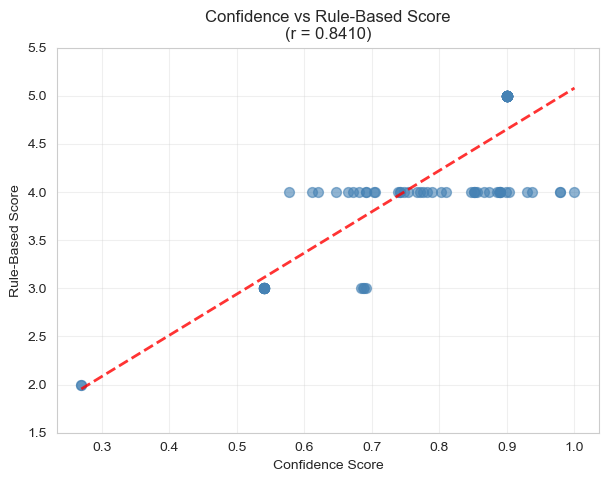

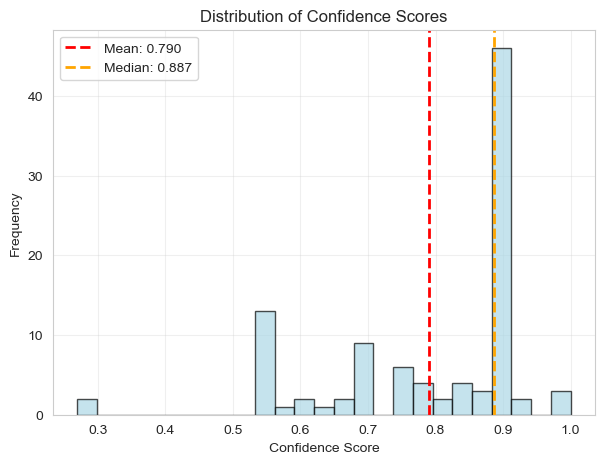

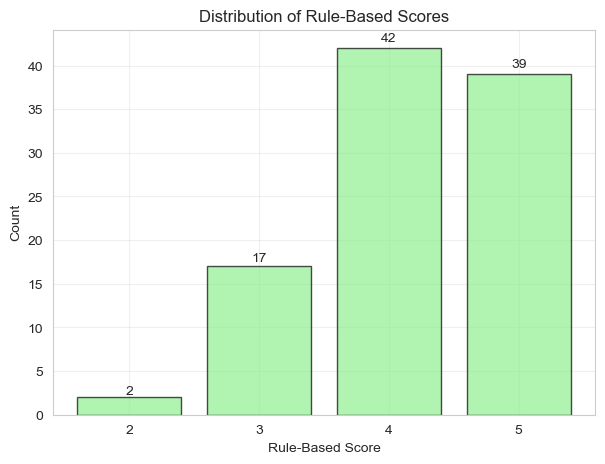

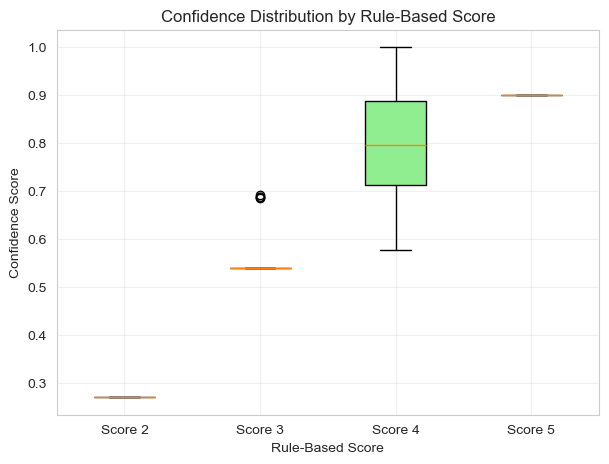

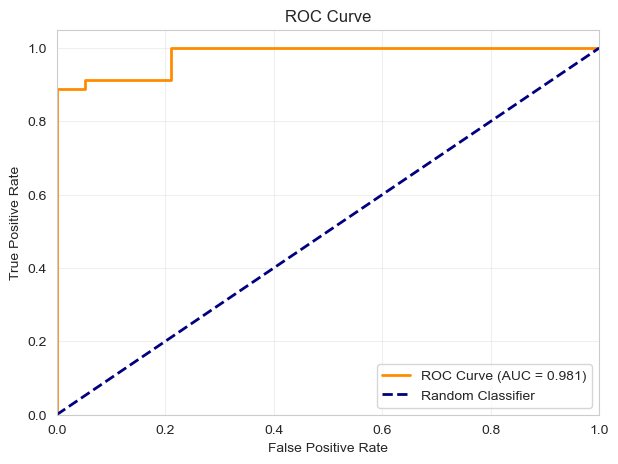

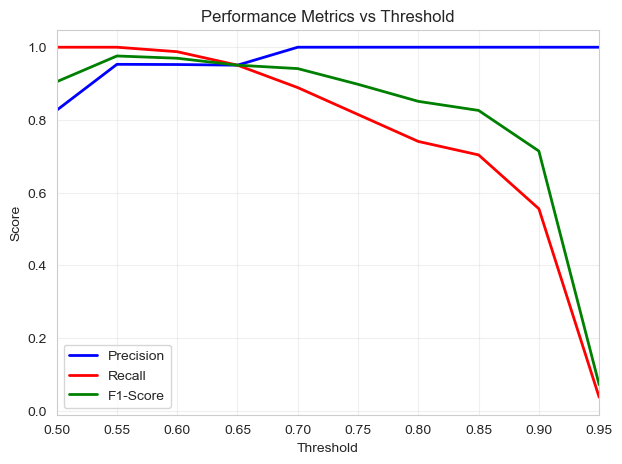


RECOMMENDATIONS & INSIGHTS
1. CLASSIFICATION PERFORMANCE:
   • Optimal threshold: 0.55 (balances precision and recall)
   • Classification accuracy: 96.0%
   • Precision: 95.3% (low false positive rate)
   • Recall: 100.0% (captures most high-quality cases)

2. OPERATIONAL EFFICIENCY:
   • At 0.85 threshold: 57% cases can be auto-approved
   • Manual review needed: 43% of cases
   • Workload reduction: 57% fewer manual annotations

3. QUALITY ASSURANCE:
   • Overall high-quality rate: 81.0%
   • False positive rate: 21.1%
   • False negative rate: 0.0%
   • System prioritizes avoiding false approvals (high precision)

4. IMPLEMENTATION STRATEGY:
   • High precision system - suitable for autonomous operation
   • Significant efficiency gains possible


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

class ConfidenceEvaluator:
    """
    A comprehensive evaluation tool for confidence score assessment against rule-based scores.
    """
    
    def __init__(self, data_path):
        """
        Initialize the evaluator with data from CSV file.
        
        Args:
            data_path (str): Path to the CSV file containing confidence and rule_based_score columns
        """
        self.data_path = data_path
        self.df = None
        self.results = None
        
    def load_data(self):
        """Load and validate the data."""
        try:
            self.df = pd.read_csv(self.data_path)
            
            # Validate required columns
            required_cols = ['confidence', 'rule_based_score']
            missing_cols = [col for col in required_cols if col not in self.df.columns]
            
            if missing_cols:
                raise ValueError(f"Missing required columns: {missing_cols}")
                
            # Basic data validation
            if self.df['confidence'].isnull().any():
                print("Warning: Found null values in confidence scores. Removing...")
                self.df = self.df.dropna(subset=['confidence'])
                
            if self.df['rule_based_score'].isnull().any():
                print("Warning: Found null values in rule-based scores. Removing...")
                self.df = self.df.dropna(subset=['rule_based_score'])
                
            print(f"Successfully loaded {len(self.df)} records")
            return True
            
        except Exception as e:
            print(f"Error loading data: {e}")
            return False
    
    def basic_statistics(self):
        """Calculate and display basic statistical information."""
        print("\n" + "="*60)
        print("BASIC STATISTICAL SUMMARY")
        print("="*60)
        
        print(f"Sample Size: {len(self.df):,}")
        print(f"Confidence Score Statistics:")
        print(f"  Mean: {self.df['confidence'].mean():.4f} ± {self.df['confidence'].std():.4f}")
        print(f"  Range: {self.df['confidence'].min():.3f} - {self.df['confidence'].max():.3f}")
        print(f"  Median: {self.df['confidence'].median():.4f}")
        print(f"  Q1: {self.df['confidence'].quantile(0.25):.4f}")
        print(f"  Q3: {self.df['confidence'].quantile(0.75):.4f}")
        
        print(f"\nRule-Based Score Statistics:")
        print(f"  Mean: {self.df['rule_based_score'].mean():.4f} ± {self.df['rule_based_score'].std():.4f}")
        print(f"  Range: {self.df['rule_based_score'].min()} - {self.df['rule_based_score'].max()}")
        print(f"  Distribution: {dict(self.df['rule_based_score'].value_counts().sort_index())}")
        
        return self.df.describe()
    
    def correlation_analysis(self):
        """Perform comprehensive correlation analysis."""
        print("\n" + "="*60)
        print("CORRELATION ANALYSIS")
        print("="*60)
        
        # Pearson correlation
        pearson_r, pearson_p = stats.pearsonr(self.df['confidence'], self.df['rule_based_score'])
        
        # Spearman correlation
        spearman_r, spearman_p = stats.spearmanr(self.df['confidence'], self.df['rule_based_score'])
        
        # Kendall's tau
        kendall_tau, kendall_p = stats.kendalltau(self.df['confidence'], self.df['rule_based_score'])
        
        # R-squared and additional statistics
        r_squared = pearson_r ** 2
        n = len(self.df)
        t_stat = pearson_r * np.sqrt((n - 2) / (1 - r_squared)) if r_squared < 1 else np.inf
        
        print(f"Pearson Correlation: r = {pearson_r:.4f} (p = {pearson_p:.6f})")
        print(f"Spearman Correlation: ρ = {spearman_r:.4f} (p = {spearman_p:.6f})")
        print(f"Kendall's Tau: τ = {kendall_tau:.4f} (p = {kendall_p:.6f})")
        print(f"R-squared: {r_squared:.4f} ({r_squared*100:.1f}% variance explained)")
        print(f"t-statistic: t({n-2}) = {t_stat:.4f}")
        
        # Effect size interpretation
        if abs(pearson_r) >= 0.7:
            effect_size = "Strong correlation"
        elif abs(pearson_r) >= 0.5:
            effect_size = "Moderate correlation"
        elif abs(pearson_r) >= 0.3:
            effect_size = "Weak correlation"
        else:
            effect_size = "Very weak correlation"
        
        print(f"Effect Size: {effect_size}")
        
        # Confidence interval for correlation
        z_r = np.arctanh(pearson_r)
        se = 1 / np.sqrt(n - 3)
        z_ci = 1.96 * se
        ci_lower = np.tanh(z_r - z_ci)
        ci_upper = np.tanh(z_r + z_ci)
        print(f"95% CI for correlation: [{ci_lower:.4f}, {ci_upper:.4f}]")
        
        return pearson_r, pearson_p, r_squared
    
    def confidence_breakdown_analysis(self):
        """Analyze performance across different confidence intervals."""
        print("\n" + "="*60)
        print("CONFIDENCE INTERVAL BREAKDOWN ANALYSIS")
        print("="*60)
        
        # Define confidence intervals
        intervals = [
            ("Very High (≥0.90)", 0.90, 1.00),
            ("High (0.80-0.89)", 0.80, 0.90),
            ("Medium (0.70-0.79)", 0.70, 0.80),
            ("Low (0.60-0.69)", 0.60, 0.70),
            ("Very Low (<0.60)", 0.00, 0.60)
        ]
        
        breakdown_results = []
        
        for name, lower, upper in intervals:
            if lower == 0.00:
                group = self.df[self.df['confidence'] < upper]
            else:
                group = self.df[(self.df['confidence'] >= lower) & (self.df['confidence'] < upper)]
            
            if len(group) > 0:
                scores = group['rule_based_score']
                high_quality_pct = (scores >= 4).sum() / len(scores) * 100
                perfect_pct = (scores == 5).sum() / len(scores) * 100
                score_dist = scores.value_counts().sort_index()
                
                result = {
                    'interval': name,
                    'count': len(group),
                    'percentage': len(group)/len(self.df)*100,
                    'mean_score': scores.mean(),
                    'std_score': scores.std(),
                    'high_quality_pct': high_quality_pct,
                    'perfect_pct': perfect_pct,
                    'score_distribution': dict(score_dist)
                }
                breakdown_results.append(result)
                
                print(f"\n{name}:")
                print(f"  Sample Size: {len(group):,} ({len(group)/len(self.df)*100:.1f}%)")
                print(f"  Average Score: {scores.mean():.2f} ± {scores.std():.2f}")
                print(f"  High Quality Rate (≥4): {high_quality_pct:.1f}%")
                print(f"  Perfect Rate (=5): {perfect_pct:.1f}%")
                print(f"  Score Distribution: {dict(score_dist)}")
        
        return breakdown_results
    
    def threshold_analysis(self, thresholds=None):
        """Analyze classification performance at different confidence thresholds."""
        print("\n" + "="*60)
        print("THRESHOLD ANALYSIS")
        print("="*60)
        
        if thresholds is None:
            thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]
        
        print("Threshold | Precision | Recall | F1-Score | Accuracy | Specificity | NPV    | FPR")
        print("----------|-----------|--------|----------|----------|-------------|--------|--------")
        
        results = []
        
        # Convert rule_based_score to binary classification (4-5 as high quality, 2-3 as low quality)
        y_true = (self.df['rule_based_score'] >= 4).astype(int)
        
        for threshold in thresholds:
            y_pred = (self.df['confidence'] >= threshold).astype(int)
            
            # Calculate confusion matrix
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            
            # Calculate metrics
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            accuracy = (tp + tn) / (tp + fp + tn + fn)
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
            
            print(f"{threshold:8.2f} | {precision:9.3f} | {recall:6.3f} | {f1:8.3f} | {accuracy:8.3f} | {specificity:11.3f} | {npv:6.3f} | {fpr:6.3f}")
            
            results.append({
                'threshold': threshold,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'accuracy': accuracy,
                'specificity': specificity,
                'npv': npv,
                'fpr': fpr,
                'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
            })
        
        # Find optimal thresholds for different criteria
        best_f1 = max(results, key=lambda x: x['f1'])
        best_accuracy = max(results, key=lambda x: x['accuracy'])
        best_precision = max(results, key=lambda x: x['precision'])
        
        print(f"\nOptimal Thresholds:")
        print(f"  Best F1-Score: {best_f1['threshold']} (F1: {best_f1['f1']:.3f})")
        print(f"  Best Accuracy: {best_accuracy['threshold']} (Acc: {best_accuracy['accuracy']:.3f})")
        print(f"  Best Precision: {best_precision['threshold']} (Prec: {best_precision['precision']:.3f})")
        
        self.results = results
        return results, best_f1
    
    def cost_benefit_analysis(self, manual_cost=1.0, error_cost=3.0, results=None):
        """Perform cost-benefit analysis for different thresholds."""
        print("\n" + "="*60)
        print("COST-BENEFIT ANALYSIS")
        print("="*60)
        print(f"Assumptions: Manual Review Cost = {manual_cost}, Auto-Approval Error Cost = {error_cost}")
        print("Threshold | Auto-Approve% | Errors | Manual Reviews | Total Cost | Savings%")
        print("----------|---------------|--------|----------------|------------|----------")
        
        if results is None:
            results = self.results
        
        baseline_cost = len(self.df) * manual_cost
        cost_analysis = []
        
        for result in results:
            threshold = result['threshold']
            auto_approved = (self.df['confidence'] >= threshold).sum()
            auto_approved_pct = auto_approved / len(self.df) * 100
            
            errors = result['fp']  # False positives: auto-approved but low quality
            manual_review = len(self.df) - auto_approved
            
            total_cost = (manual_review * manual_cost) + (errors * error_cost)
            savings_pct = (baseline_cost - total_cost) / baseline_cost * 100
            
            cost_analysis.append({
                'threshold': threshold,
                'auto_approved_pct': auto_approved_pct,
                'errors': errors,
                'manual_reviews': manual_review,
                'total_cost': total_cost,
                'savings_pct': savings_pct
            })
            
            print(f"{threshold:8.2f} | {auto_approved_pct:12.1f} | {errors:6d} | {manual_review:14d} | {total_cost:10.1f} | {savings_pct:8.1f}")
        
        # Find most cost-effective threshold
        best_savings = max(cost_analysis, key=lambda x: x['savings_pct'])
        print(f"\nMost Cost-Effective Threshold: {best_savings['threshold']} ({best_savings['savings_pct']:.1f}% savings)")
        
        return cost_analysis
    
    def plot_comprehensive_analysis(self, pearson_r):
        """Create individual visualization plots instead of subplots."""

        # 1. Scatter plot with regression line
        plt.figure(figsize=(7, 5))
        plt.scatter(self.df['confidence'], self.df['rule_based_score'], alpha=0.6, s=50, color='steelblue')

        # Add regression line
        z = np.polyfit(self.df['confidence'], self.df['rule_based_score'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(self.df['confidence'].min(), self.df['confidence'].max(), 100)
        plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)

        plt.xlabel('Confidence Score')
        plt.ylabel('Rule-Based Score')
        plt.title(f'Confidence vs Rule-Based Score\n(r = {pearson_r:.4f})')
        plt.ylim(1.5, 5.5)
        plt.grid(True, alpha=0.3)
        plt.show()

        # 2. Confidence distribution
        plt.figure(figsize=(7, 5))
        plt.hist(self.df['confidence'], bins=25, alpha=0.7, color='lightblue', edgecolor='black')
        plt.axvline(self.df['confidence'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {self.df["confidence"].mean():.3f}')
        plt.axvline(self.df['confidence'].median(), color='orange', linestyle='--', linewidth=2, 
                    label=f'Median: {self.df["confidence"].median():.3f}')
        plt.xlabel('Confidence Score')
        plt.ylabel('Frequency')
        plt.title('Distribution of Confidence Scores')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        # 3. Rule-based score distribution
        plt.figure(figsize=(7, 5))
        score_counts = self.df['rule_based_score'].value_counts().sort_index()
        bars = plt.bar(score_counts.index, score_counts.values, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.xlabel('Rule-Based Score')
        plt.ylabel('Count')
        plt.title('Distribution of Rule-Based Scores')
        plt.xticks(score_counts.index)

        for bar, count in zip(bars, score_counts.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + count*0.01, 
                    str(count), ha='center', va='bottom')
        plt.grid(True, alpha=0.3)
        plt.show()

        # 4. Box plot: Confidence distribution by score
        plt.figure(figsize=(7, 5))
        score_groups = []
        labels = []
        for score in sorted(self.df['rule_based_score'].unique()):
            score_groups.append(self.df[self.df['rule_based_score'] == score]['confidence'])
            labels.append(f'Score {score}')
        bp = plt.boxplot(score_groups, labels=labels, patch_artist=True)
        colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
        plt.xlabel('Rule-Based Score')
        plt.ylabel('Confidence Score')
        plt.title('Confidence Distribution by Rule-Based Score')
        plt.grid(True, alpha=0.3)
        plt.show()

        # 5. ROC Curve
        plt.figure(figsize=(7, 5))
        y_true = (self.df['rule_based_score'] >= 4).astype(int)
        fpr, tpr, thresholds = roc_curve(y_true, self.df['confidence'])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()

        # 6. Precision-Recall vs Threshold
        if self.results:
            plt.figure(figsize=(7, 5))
            thresholds = [r['threshold'] for r in self.results]
            precisions = [r['precision'] for r in self.results]
            recalls = [r['recall'] for r in self.results]
            f1_scores = [r['f1'] for r in self.results]

            plt.plot(thresholds, precisions, 'b-', label='Precision', linewidth=2)
            plt.plot(thresholds, recalls, 'r-', label='Recall', linewidth=2)
            plt.plot(thresholds, f1_scores, 'g-', label='F1-Score', linewidth=2)

            plt.xlabel('Threshold')
            plt.ylabel('Score')
            plt.title('Performance Metrics vs Threshold')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xlim([min(thresholds), max(thresholds)])
            plt.show()

    
    def generate_recommendations(self, best_result):
        """Generate actionable recommendations based on analysis."""
        print("\n" + "="*60)
        print("RECOMMENDATIONS & INSIGHTS")
        print("="*60)
        
        # Performance insights
        print("1. CLASSIFICATION PERFORMANCE:")
        print(f"   • Optimal threshold: {best_result['threshold']} (balances precision and recall)")
        print(f"   • Classification accuracy: {best_result['accuracy']*100:.1f}%")
        print(f"   • Precision: {best_result['precision']*100:.1f}% (low false positive rate)")
        print(f"   • Recall: {best_result['recall']*100:.1f}% (captures most high-quality cases)")
        
        # Operational efficiency
        auto_approved_85 = (self.df['confidence'] >= 0.85).sum()
        auto_approved_pct_85 = auto_approved_85 / len(self.df) * 100
        
        print(f"\n2. OPERATIONAL EFFICIENCY:")
        print(f"   • At 0.85 threshold: {auto_approved_pct_85:.0f}% cases can be auto-approved")
        print(f"   • Manual review needed: {100-auto_approved_pct_85:.0f}% of cases")
        print(f"   • Workload reduction: {auto_approved_pct_85:.0f}% fewer manual annotations")
        
        # Quality assurance
        high_quality_rate = (self.df['rule_based_score'] >= 4).sum() / len(self.df) * 100
        print(f"\n3. QUALITY ASSURANCE:")
        print(f"   • Overall high-quality rate: {high_quality_rate:.1f}%")
        print(f"   • False positive rate: {(1-best_result['specificity'])*100:.1f}%")
        print(f"   • False negative rate: {(1-best_result['recall'])*100:.1f}%")
        print(f"   • System prioritizes avoiding false approvals (high precision)")
        
        # Implementation strategy
        print(f"\n4. IMPLEMENTATION STRATEGY:")
        if best_result['precision'] > 0.9:
            print("   • High precision system - suitable for autonomous operation")
        elif best_result['precision'] > 0.8:
            print("   • Good precision - recommend with human oversight")
        else:
            print("   • Moderate precision - requires careful threshold tuning")
            
        if auto_approved_pct_85 > 50:
            print("   • Significant efficiency gains possible")
        else:
            print("   • Limited efficiency gains - consider model improvements")
    
    def run_complete_evaluation(self):
        """Run the complete evaluation pipeline."""
        print("CONFIDENCE ASSESSMENT EVALUATION SYSTEM")
        print("="*60)
        
        # Load data
        if not self.load_data():
            return None
        
        # Run all analyses
        self.basic_statistics()
        pearson_r, pearson_p, r_squared = self.correlation_analysis()
        self.confidence_breakdown_analysis()
        results, best_result = self.threshold_analysis()
        self.cost_benefit_analysis()
        
        # Generate visualizations
        self.plot_comprehensive_analysis(pearson_r)
        
        # Provide recommendations
        self.generate_recommendations(best_result)
        
        return {
            'correlation': {'pearson_r': pearson_r, 'p_value': pearson_p, 'r_squared': r_squared},
            'best_threshold': best_result,
            'threshold_results': results,
            'data_summary': self.df.describe()
        }

def main():
    """Main execution function."""
    # Initialize evaluator with your data path
    data_path = "D:\\Postgraduate\\Data Science Project\\Code\\1851_validation_sample_confidence.csv"  # Update this path
    
    evaluator = ConfidenceEvaluator(data_path)
    results = evaluator.run_complete_evaluation()
    
    return evaluator, results

if __name__ == "__main__":
    evaluator, results = main()